<a href="https://colab.research.google.com/github/MahimaRamireddy/BMI-calculator/blob/main/Complaint%20Closure%20Predictor./Complaint_Closure_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tkinter import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the dataset
complaints_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/complaint.csv')

#removing rows where complaint details and type are not specified
complaints_df=complaints_df.dropna(subset=['Complaint Type','Complaint Details'])

#removing unused columns
complaints_df = complaints_df.drop(['S No.', 'Name', 'Roll No.','Phone No.'], axis=1)

#filling null values in status column with unresolved
complaints_df['Status'].fillna('Unresolved', inplace=True)


#converting date columns into date-time format
complaints_df['Date'] = pd.to_datetime(complaints_df['Date'], format='%d-%m-%Y')
complaints_df['Closing Date'] = pd.to_datetime(complaints_df['Closing Date'], format='%d-%m-%Y')

#removing rows where opening date is later than closing date
complaints_df = complaints_df[complaints_df['Closing Date'] >= complaints_df['Date']]



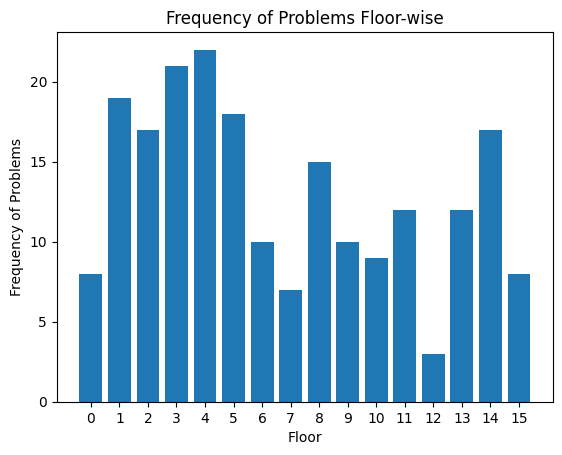

In [4]:
def extract_floor(room_number):
    if room_number == "ground floor":
        return 0  # Special case for ground floor
    room_str = str(room_number)
    if room_str.isdigit():  # Check if the room number is numeric
        if len(room_str) == 4:
            floor_str = room_str[:2]  # Extract the first two digits for 4-digit room numbers
        else:
            floor_str = room_str[0]  # Extract the first digit for 2-digit room numbers
        return int(floor_str)

# Apply the function to create a new column 'Floor' in the DataFrame
complaints_df['Floor'] = complaints_df['Room No.'].apply(extract_floor)

complaints_df['Floor'] = complaints_df['Floor'].fillna(method='ffill')

# Group the data by 'Floor' and count the number of occurrences
floor_counts = complaints_df['Floor'].value_counts().sort_index()

# Plot the data
plt.bar(floor_counts.index, floor_counts.values)
plt.xlabel('Floor')
plt.ylabel('Frequency of Problems')
plt.title('Frequency of Problems Floor-wise')
plt.xticks(floor_counts.index)
plt.show()



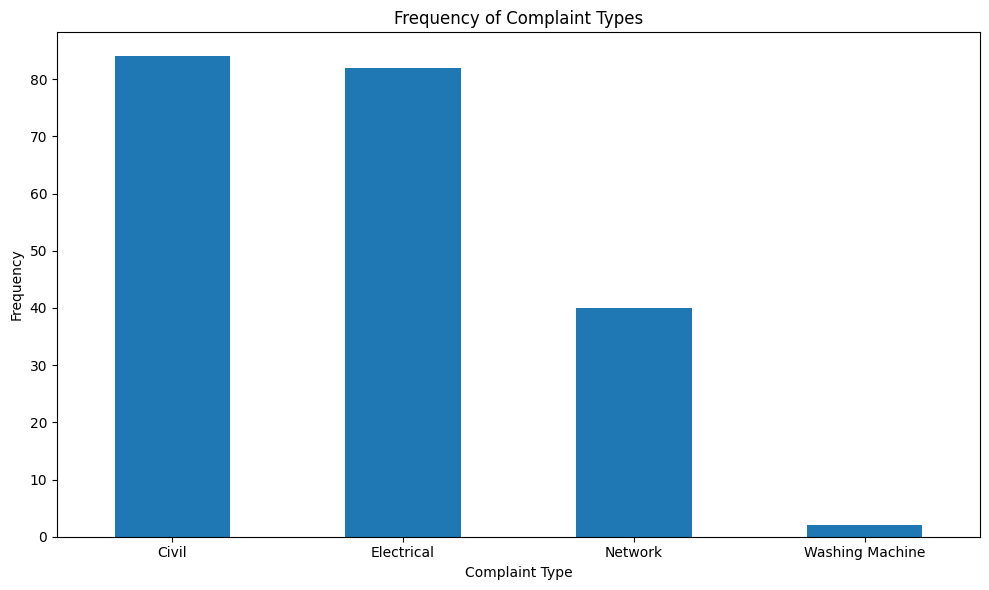

In [5]:
complaint_counts = complaints_df['Complaint Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
complaint_counts.plot(kind='bar')
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Frequency of Complaint Types')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()





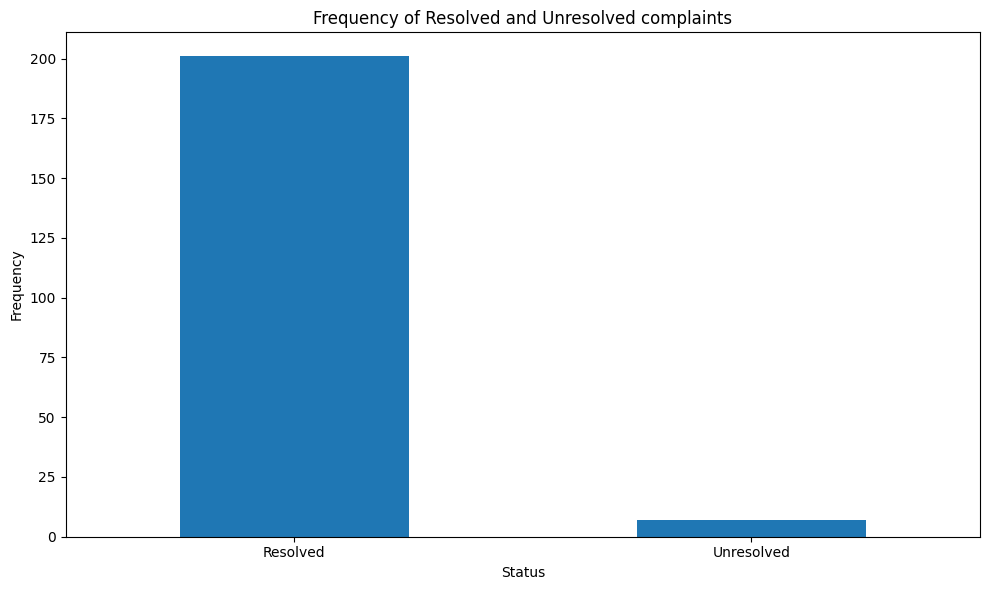

In [6]:
status_counts = complaints_df['Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Frequency of Resolved and Unresolved complaints')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

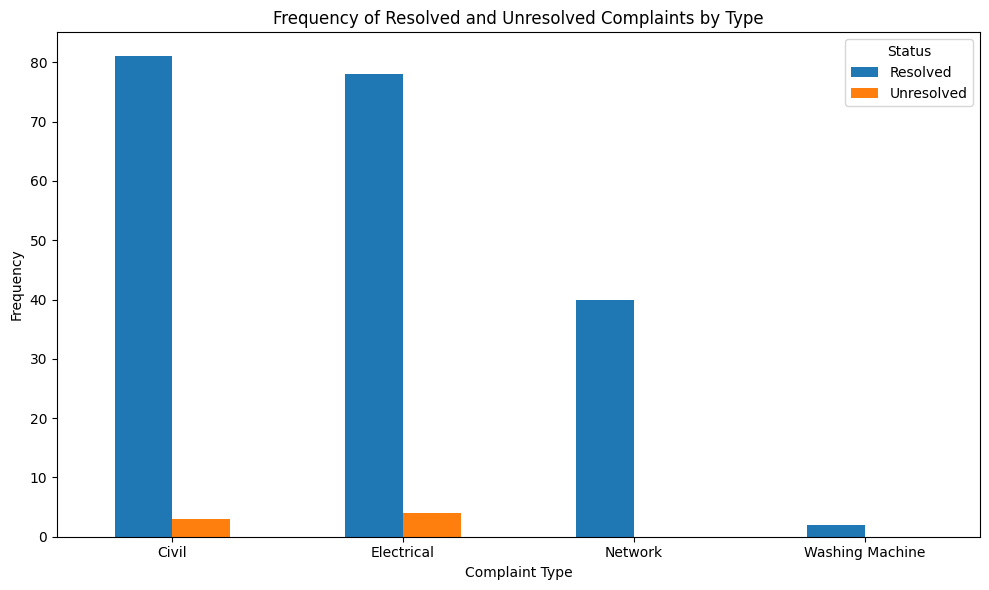

In [7]:
# Count the number of resolved and unresolved complaints by type
counts = complaints_df[complaints_df['Status'].isin(['Resolved', 'Unresolved'])].groupby(['Complaint Type', 'Status']).size().unstack(fill_value=0)

# Create a bar plot
counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Complaint Type')
plt.ylabel('Frequency')
plt.title('Frequency of Resolved and Unresolved Complaints by Type')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

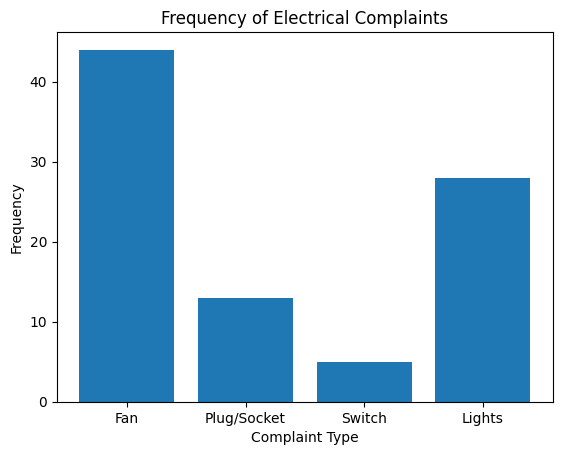

In [8]:
fan_complaints = 0
plug_socket_complaints = 0
switch_complaints = 0
light_complaints=0

# Iterate through the data and count complaints
for _, row in complaints_df.iterrows():
        complaint_details = row['Complaint Details']
        if isinstance(complaint_details, str):
            complaint_details = complaint_details.lower()
            if "fan" in complaint_details or "Fan" in complaint_details:
                    fan_complaints+=1
                    complaints_df['Sub Type']=1
            if "socket"  in complaint_details or "Socket"  in complaint_details or "plug"  in complaint_details or "Plug"  in complaint_details or "charger" in complaint_details or "charging" in complaint_details:
                    plug_socket_complaints+=1
                    complaints_df['Sub Type']=2
            if "switch" in complaint_details or "Switch" in complaint_details:
                switch_complaints+=1
                complaints_df['Sub Type']=3
            if "light" in complaint_details or "Light" in complaint_details:
                light_complaints+=1
                complaints_df['Sub Type']=4


# Prepare data for plotting
categories = ["Fan", "Plug/Socket", "Switch" , "Lights"]
complaint_counts = [fan_complaints, plug_socket_complaints, switch_complaints,light_complaints]

#print(complaint_counts)

# Create a bar plot
plt.bar(categories, complaint_counts)
plt.xlabel("Complaint Type")
plt.ylabel("Frequency")
plt.title("Frequency of Electrical Complaints")
plt.show()



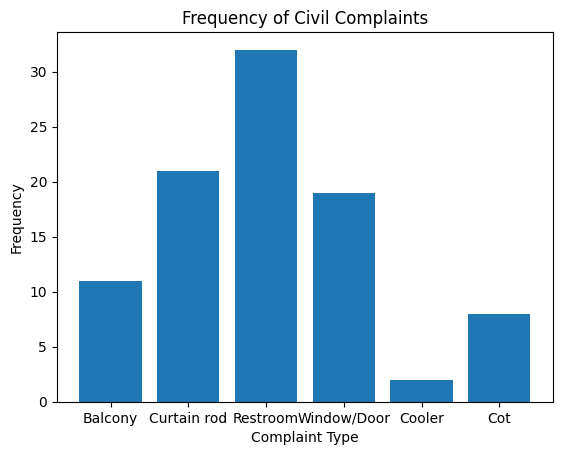

In [9]:
# Initialize complaint counters
restroom_complaints = 0
cot_complaints = 0
curtain_rod_complaints = 0
cooler_complaints = 0
window_door_complaints = 0
balcony_complaints = 0

# Iterate through the data and count complaints
for _, row in complaints_df.iterrows():
    complaint_details = row['Complaint Details']
    complaint_type = row['Complaint Type']

    if isinstance(complaint_details, str):
        complaint_details = complaint_details.lower()
        if "cot" in complaint_details or "bed" in complaint_details:
                cot_complaints += 1
        if "rest" in complaint_details or "wash" in complaint_details or "sink" in complaint_details or "basin" in complaint_details:
                restroom_complaints += 1

        if "cooler" in complaint_details or "purifier" in complaint_details:
                cooler_complaints += 1

        if "window" in complaint_details or "door" in complaint_details:
                window_door_complaints += 1

        if "curtain" in complaint_details or "rod" in complaint_details:
                curtain_rod_complaints += 1

        if "balcony" in complaint_details:
                balcony_complaints += 1


# Prepare data for plotting
categories = ["Balcony", "Curtain rod", "Restroom", "Window/Door", "Cooler", "Cot"]
complaint_counts = [balcony_complaints, curtain_rod_complaints, restroom_complaints, window_door_complaints, cooler_complaints, cot_complaints]

# Create a bar plot
plt.bar(categories, complaint_counts)
plt.xlabel("Complaint Type")
plt.ylabel("Frequency")
plt.title("Frequency of Civil Complaints")
plt.show()






In [10]:
# Iterate through the data and count complaints
for index, row in complaints_df.iterrows():
        complaint_details = row['Complaint Details']
        if isinstance(complaint_details, str):
            complaint_details = complaint_details.lower()
            if "fan" in complaint_details:
                complaints_df.at[index,'Sub Type']=1
            elif "socket"  in complaint_details or "plug"  in complaint_details or "charger" in complaint_details or "charging" in complaint_details:
                complaints_df.at[index,'Sub Type']=2
            elif "switch" in complaint_details :
                complaints_df.at[index,'Sub Type']=3
            elif "light" in complaint_details :
                complaints_df.at[index,'Sub Type']=4
            elif "cot" in complaint_details or "bed" in complaint_details :
                complaints_df.at[index,'Sub Type']=5
            elif "rest" in complaint_details or "wash" in complaint_details or "sink" in complaint_details or "basin" in complaint_details or"toilet" in complaint_details :
                complaints_df.at[index,'Sub Type']=6
            elif "cooler" in complaint_details or "purifier" in complaint_details:
                complaints_df.at[index,'Sub Type']=7
            elif "window" in complaint_details or "door" in complaint_details:
                complaints_df.at[index,'Sub Type']=8
            elif "curtain" in complaint_details or "rod" in complaint_details:
                complaints_df.at[index,'Sub Type']=9
            elif "balcony" in complaint_details:
                complaints_df.at[index,'Sub Type']=10
            elif "lan" in complaint_details :
                complaints_df.at[index,'Sub Type']=11
            elif "washing" in complaint_details:
                complaints_df.at[index,'Sub Type']=12
            else :
                complaints_df.at[index,'Sub Type']=13




type_mapping={'Electrical' : 1,'Civil': 2,'Washing Machine' : 3,'Network' : 4}

status_mapping={'Resolved' : 1, 'Unresolved':0}



complaints_df['type_num']=complaints_df['Complaint Type'].replace(type_mapping)
complaints_df['status_num']=complaints_df['Status'].replace(status_mapping)






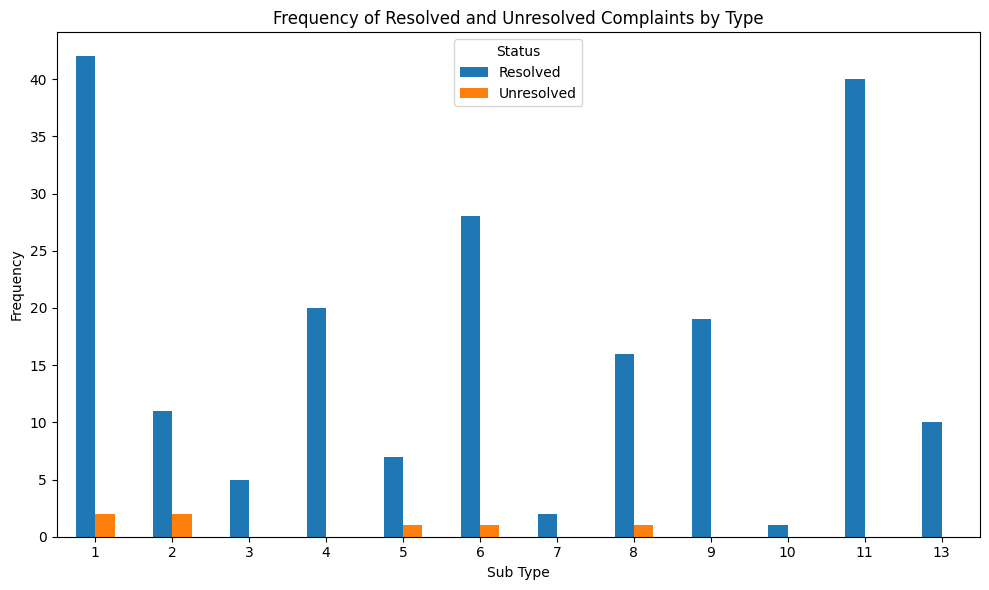

In [11]:


# Count the number of resolved and unresolved complaints by type
counts = complaints_df[complaints_df['Status'].isin(['Resolved', 'Unresolved'])].groupby(['Sub Type', 'Status']).size().unstack(fill_value=0)

# Create a bar plot
counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Sub Type')
plt.ylabel('Frequency')
plt.title('Frequency of Resolved and Unresolved Complaints by Type')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

    Sub Type  Days to Close
0          1       1.818182
1          2       1.461538
2          3       2.400000
3          4       1.550000
4          5      17.125000
5          6       0.931034
6          7       0.000000
7          8       8.058824
8          9       4.157895
9         10       1.000000
10        11       4.650000
11        13       7.900000
    Complaint Type  Days to Close
0            Civil       5.547619
1       Electrical       1.658537
2          Network       4.650000
3  Washing Machine       0.000000


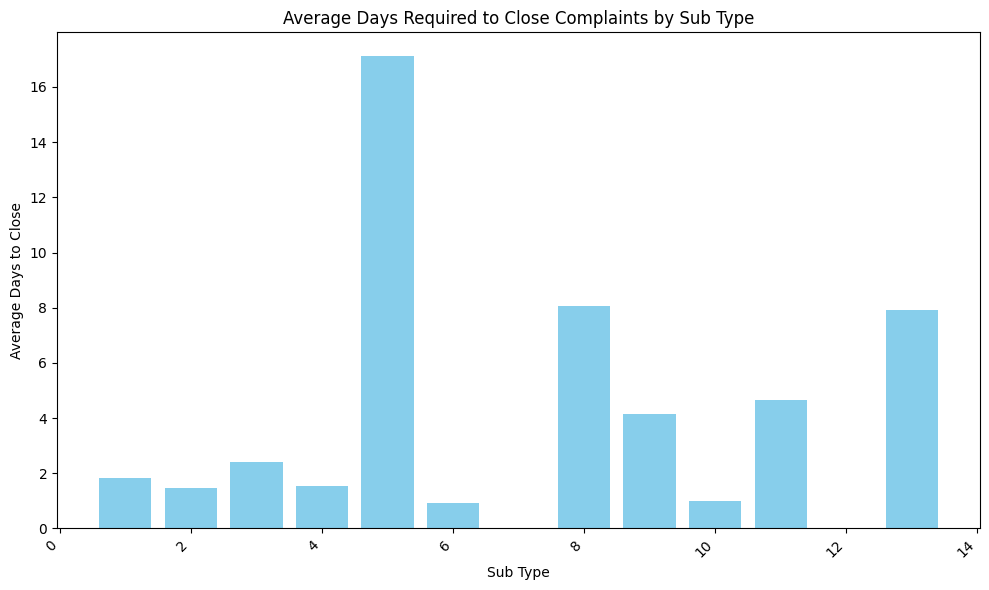

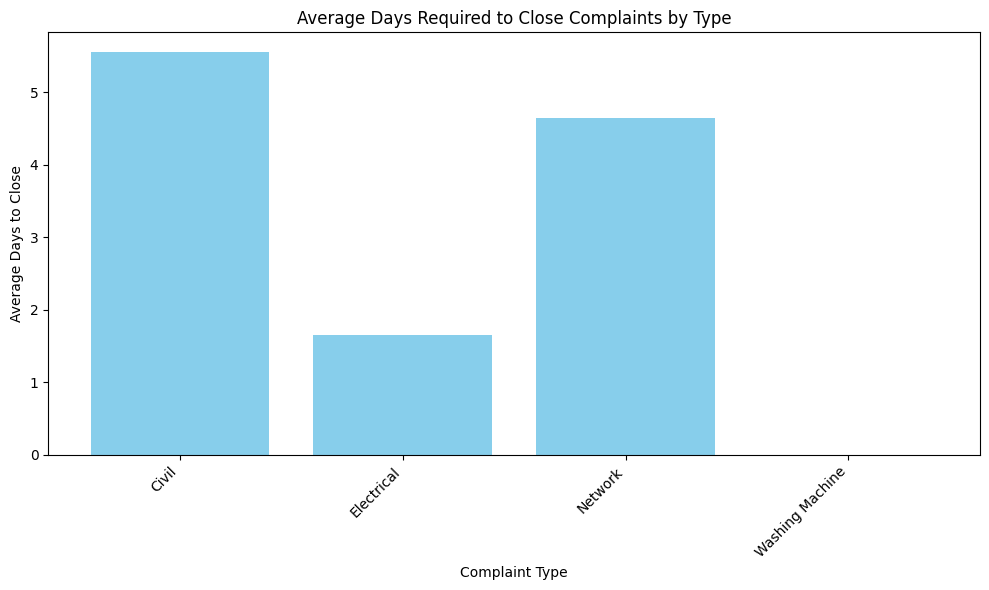

In [12]:
# Calculate the days required to close each complaint
complaints_df['Days to Close'] = (complaints_df['Closing Date'] - pd.to_datetime(complaints_df['Date'], format='%d-%m-%Y')).dt.days

complaint_stats = complaints_df.groupby('Sub Type')['Days to Close'].mean().reset_index()

print(complaint_stats)

complaint_type_stats=complaints_df.groupby('Complaint Type')['Days to Close'].mean().reset_index()

print(complaint_type_stats)


subtype_mapping = {
    1: 'fan',
    2: 'socket',
    3: 'switch',
    4: 'light',
    5: 'cot',
    6: 'rest room',
    7: 'cooler',
    8: 'window/door',
    9: 'curtain rod',
    10: 'balcony',
    11: 'lan',
    12: 'washing machine',
    13: 'others'
}

# Map the 'Sub Type' values to their corresponding strings
#complaint_stats['Sub Type'] = [subtype_mapping[sub_type] for sub_type in complaint_stats['Sub Type']]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(complaint_stats['Sub Type'], complaint_stats['Days to Close'], color='skyblue')
plt.xlabel('Sub Type')
plt.ylabel('Average Days to Close')
plt.title('Average Days Required to Close Complaints by Sub Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(complaint_type_stats['Complaint Type'], complaint_type_stats['Days to Close'], color='skyblue')
plt.xlabel('Complaint Type')
plt.ylabel('Average Days to Close')
plt.title('Average Days Required to Close Complaints by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



#print(complaints_df)
#network_complaints = complaints_df[complaints_df['Complaint Type'] == 4]
#print(network_complaints)



               type_num     Floor  Sub Type  status_num  Days to Close
type_num       1.000000  0.098917  0.814715    0.098458       0.145241
Floor          0.098917  1.000000  0.021129    0.056530       0.012351
Sub Type       0.814715  0.021129  1.000000    0.123193       0.198638
status_num     0.098458  0.056530  0.123193    1.000000       0.075843
Days to Close  0.145241  0.012351  0.198638    0.075843       1.000000


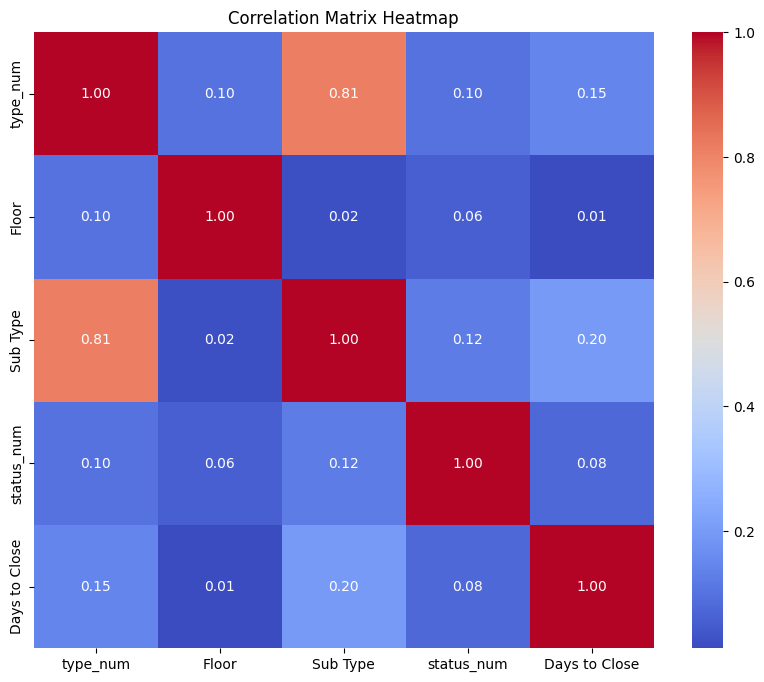

In [13]:


specified_columns=['type_num','Floor','Sub Type','status_num']
target_variable=['Days to Close']

correlation_matrix = complaints_df[specified_columns + target_variable].corr()
print(correlation_matrix )


# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

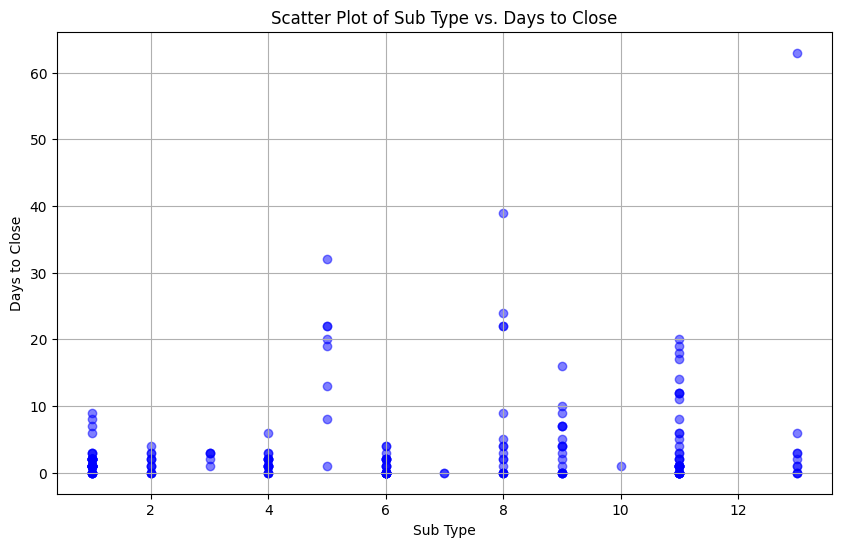

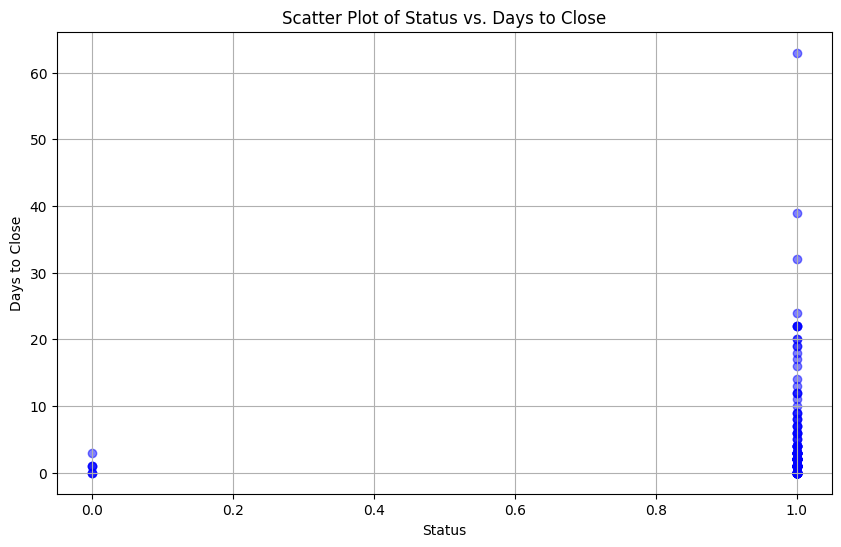

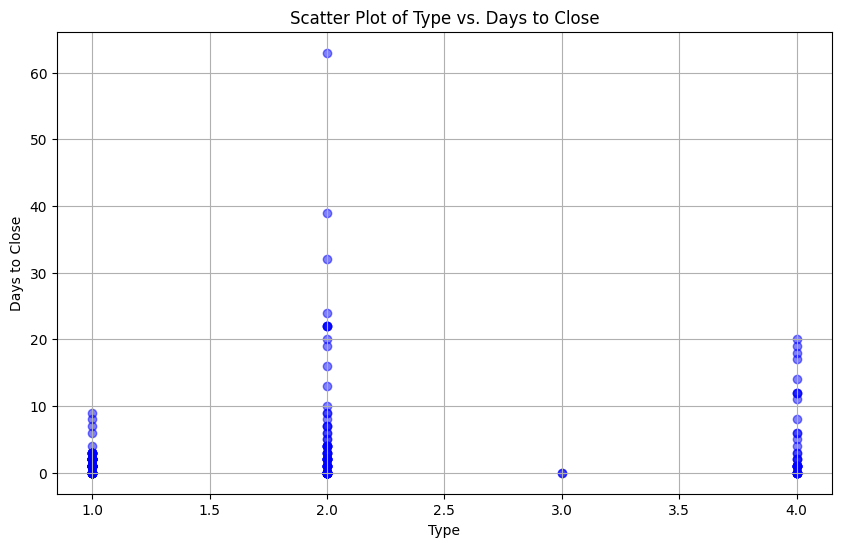

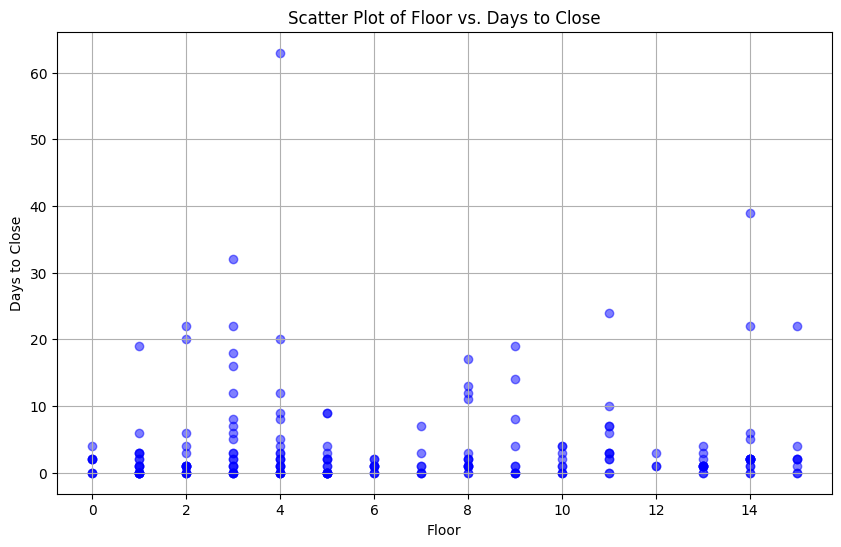

In [14]:
# Your data: X (Sub Type) and Y (Days to Close)
K1 = complaints_df['Sub Type']

K2 = complaints_df['status_num']

K3=complaints_df['type_num']

K4=complaints_df['Floor']

L = complaints_df['Days to Close']

# Create a scatter plot subtype vs days to close
plt.figure(figsize=(10, 6))
plt.scatter(K1, L, c='blue', alpha=0.5)  # You can adjust the color and transparency
plt.title("Scatter Plot of Sub Type vs. Days to Close")
plt.xlabel("Sub Type")
plt.ylabel("Days to Close")
plt.grid(True)

# Show the plot
plt.show()

# Create a scatter plot status vs days to close
plt.figure(figsize=(10, 6))
plt.scatter(K2, L, c='blue', alpha=0.5)  # You can adjust the color and transparency
plt.title("Scatter Plot of Status vs. Days to Close")
plt.xlabel("Status")
plt.ylabel("Days to Close")
plt.grid(True)

# Show the plot
plt.show()

# Create a scatter plot type vs days to close
plt.figure(figsize=(10, 6))
plt.scatter(K3, L, c='blue', alpha=0.5)  # You can adjust the color and transparency
plt.title("Scatter Plot of Type vs. Days to Close")
plt.xlabel("Type")
plt.ylabel("Days to Close")
plt.grid(True)

# Show the plot
plt.show()

# Create a scatter plot floor vs days to close
plt.figure(figsize=(10, 6))
plt.scatter(K4, L, c='blue', alpha=0.5)  # You can adjust the color and transparency
plt.title("Scatter Plot of Floor vs. Days to Close")
plt.xlabel("Floor")
plt.ylabel("Days to Close")
plt.grid(True)

# Show the plot
plt.show()

In [15]:



complaints_df.to_csv('/content/drive/MyDrive/Colab Notebooks/changes.csv', index=False)

from sklearn.linear_model import LinearRegression
# Select relevant features for the regressor
features = ['Sub Type','type_num','status_num']
X = complaints_df[features]
y = complaints_df['Days to Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a regression model (Random Forest Regressor)
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
#regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)



In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared (R2) Error
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Error: {r2:.2f}")






Mean Absolute Error: 2.99
Mean Squared Error (MSE): 22.16
R-squared (R2) Error: 0.22


In [17]:
from sklearn.model_selection import cross_val_score

# Define the number of folds for cross-validation (e.g., 5 or 10)
num_folds = 5

# Perform cross-validation and obtain cross-validation scores
cross_val_scores = cross_val_score(regressor, X, y, cv=num_folds, scoring='neg_mean_squared_error')

print("Cross-Validation Scores (Negative MSE):", cross_val_scores)
print("Mean Negative MSE:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())



Cross-Validation Scores (Negative MSE): [  -4.99306188   -1.95734355  -94.98100222 -173.77849031  -44.50461338]
Mean Negative MSE: -64.04290227021588
Standard Deviation: 64.37749652658327


In [20]:
def predict_closing_date(user_complaint_type, user_complaint_details, user_date_of_opening):
    # Create a DataFrame with user input
    user_input = pd.DataFrame({
        'Complaint Type': [user_complaint_type],
        'Complaint Details': [user_complaint_details],
        'Date': [user_date_of_opening],
    })

    try:
        date = pd.to_datetime(user_input['Date'], format='%d-%m-%Y')
    except ValueError:
        print("Invalid date format. Please enter the date in the format dd-mm-yyyy.")
        return

    type_num = 0
    Sub_Type = 0

    complaint = user_input['Complaint Type'][0].lower()

    # Map complaint types to numbers
    if complaint == 'electrical':
        type_num = 1
    elif complaint == 'civil':
        type_num = 2
    elif complaint == 'washing machine':
        type_num = 3
    elif complaint == 'network':
        type_num = 4
    else:
        print("Unknown complaint type. Please enter a valid complaint type.")
        return

    complaint_details = user_input['Complaint Details'][0].lower()

    # Map complaint details to sub-types
    if "fan" in complaint_details:
        Sub_Type = 1
    elif any(x in complaint_details for x in ["socket", "plug", "charger", "charging"]):
        Sub_Type = 2
    elif "switch" in complaint_details:
        Sub_Type = 3
    elif "light" in complaint_details:
        Sub_Type = 4
    elif any(x in complaint_details for x in ["cot", "bed"]):
        Sub_Type = 5
    elif any(x in complaint_details for x in ["rest", "wash", "sink", "basin", "toilet"]):
        Sub_Type = 6
    elif any(x in complaint_details for x in ["cooler", "purifier"]):
        Sub_Type = 7
    elif any(x in complaint_details for x in ["window", "door"]):
        Sub_Type = 8
    elif any(x in complaint_details for x in ["curtain", "rod"]):
        Sub_Type = 9
    elif "balcony" in complaint_details:
        Sub_Type = 10
    elif "lan" in complaint_details:
        Sub_Type = 11
    elif "washing" in complaint_details:
        Sub_Type = 12
    else:
        Sub_Type = 13

    # Prepare the input for the regressor
    input_features = [[Sub_Type, type_num, 0]]  # status_num is set to 0 as a placeholder

    # Predict the closing date
    predicted_days_to_close = regressor.predict(input_features)

    # Calculate the predicted closing date
    predicted_closing_date = date + pd.to_timedelta(int(predicted_days_to_close[0]), unit='d')

    # Display the predicted closing date
    print(f'Predicted Closing Date: {predicted_closing_date.dt.strftime("%Y-%m-%d").iloc[0]}')

# User input
user_complaint_type = input("Enter Complaint Type: ")
user_complaint_details = input("Enter Complaint Details: ")
user_date_of_opening = input("Enter Date of Opening (format: dd-mm-yyyy): ")

# Call the function to predict closing date based on user input
predict_closing_date(user_complaint_type, user_complaint_details, user_date_of_opening)

Enter Complaint Type: Network
Enter Complaint Details: Lan not working
Enter Date of Opening (format: dd-mm-yyyy): 28-07-2023
Predicted Closing Date: 2023-07-31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
